<a href="https://colab.research.google.com/github/TharindaAdhikari/ML_Assignment2_IT19037752_IT19047966_IT19189390/blob/ML_Development/Customer_Segmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER SEGMENTATION IN RETAIL

![link text](https://miro.medium.com/max/681/1*iejTpHhx-u_R73XQD0GFkg.jpeg)

## What is customer segmentation ?

Customer Segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. Customers are segmented according to their similarities in behavior and habits.In this project my team and I implemented two unsupervised machine learning algorithms: K-means, RDF .. . In collaboration with a online retail. Our goal is to segment their customers given the customer’s various behaviors and features, in order for the company to be able to market for each segment in a manner that is more fitting to each individual customer.

> There are different methodologies for customer segmentation, and they depend on four types of parameters:

* **Geographic** 
* **Demographic** 
* **Behavioral**
* **Psychological** 

## Advantages of customer segmentation

> Implementing customer segmentation leads to plenty of new business opportunities. You can do a lot of optimization in:

* Budgeting 
* Product design 
* Promotion 
* Marketing 
* Customer satisfaction 

## Macine learning approach for customer segmentation and market analytics

This project based on a data sample from a UK-based non-store online retail, author
identify that are important of Customer segmentation and market analytics Further,
tried to find out the Identifying potential customers and their unsatisfied
customer needs this enables marketers to create targeted marketing messages for a
specific group of customers which increases the chances of the person buying a
product.

#### Data Set Information:
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Link to the Data Set:** https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

#### Attribute Information:
* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

## Data Cleaning 

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch

In [2]:
#Read datset
data = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')

In [3]:
#print first 5 rows
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#print last 5 rows
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [5]:
# information about a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
#print some basic statistical details
data.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [7]:
#find null variables
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
print("Total Transactions :",data.shape[0])

Total Transactions : 525461


In [9]:
#Number of duplicates
print('Total Number of Duplicated Transaction:',data.duplicated().sum())

Total Number of Duplicated Transaction: 6865


In [10]:
# dropping duplicate values 
data.drop_duplicates(keep=False,inplace=True)

In [11]:
# shape of data after duplication
print('Total Number of Transaction after dropping the Duplicated Transactions :',data.shape[0])

Total Number of Transaction after dropping the Duplicated Transactions : 512178


In [12]:
# Checking for cancelled transactions
cancelled_data = data[data['Invoice'].astype(str).str[0] == 'C']
cancelled_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [13]:
print('Total Number of Cancelled Transactions: ' ,cancelled_data.shape[0])

Total Number of Cancelled Transactions:  10159


In [14]:
# Dropping the cancelled transactions
data = data.drop(index=data[data['Invoice'].astype(str).str[0] == 'C'].index)

In [15]:
#after removing cancelled data from dataframe 
print('Total Number of Transaction after dropping the Cancelled Transactions :',data.shape[0])

Total Number of Transaction after dropping the Cancelled Transactions : 502019


In [16]:
# Checking for missing values
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107381
Country             0
dtype: int64

In [17]:
#Dropping the missing values
data.dropna(axis = 0, subset = ['Customer ID'], inplace = True)

In [18]:
# Checking for missing values
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [19]:
print('Total Number of Transactions after dropping the missing values :',data.shape[0])

Total Number of Transactions after dropping the missing values : 394638


In [20]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [21]:
#print some basic statistical details
data.describe()

,Quantity,Price,Customer ID
count,394638.000000,394638.000000,394638.000000
mean,13.943409,3.316140,15354.624375
std,98.403649,35.323936,1681.578867
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13979.000000
50%,6.000000,1.950000,15311.000000
75%,12.000000,3.750000,16798.000000
max,19152.000000,10953.500000,18287.000000


In [22]:
#Adding Desired Features
data['FinalPrice'] = data['Quantity'] * data['Price']
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year
data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))
data['hour'] = data['InvoiceDate'].dt.hour

In [23]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,FinalPrice,month,year,WeekDay,month_year,hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009,Tuesday,2009-12-01,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,Tuesday,2009-12-01,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,Tuesday,2009-12-01,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,2009,Tuesday,2009-12-01,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009,Tuesday,2009-12-01,7


In [24]:
#Check register with UnitPrice negative
print('Check register with UnitPrice negative:')
display(data[(data.Price<0)])
print("Sales records with Customer ID and zero in Unit Price:",data[(data['Price']==0)  & ~(data['Customer ID'].isnull())].shape[0])
data[(data['Price']==0)  & ~(data['Customer ID'].isnull())]

Check register with UnitPrice negative:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,FinalPrice,month,year,WeekDay,month_year,hour


Sales records with Customer ID and zero in Unit Price: 31


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,FinalPrice,month,year,WeekDay,month_year,hour
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom,0.0,12,2009,Wednesday,2009-12-01,13
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom,0.0,12,2009,Thursday,2009-12-01,11
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom,0.0,12,2009,Monday,2009-12-01,16
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0.0,12,2009,Tuesday,2009-12-01,15
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0.0,12,2009,Tuesday,2009-12-01,15
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom,0.0,12,2009,Tuesday,2009-12-01,13
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom,0.0,12,2009,Friday,2009-12-01,14
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom,0.0,1,2010,Wednesday,2010-01-01,14
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium,0.0,1,2010,Friday,2010-01-01,10
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom,0.0,1,2010,Friday,2010-01-01,12


In [25]:
# Remove register withou CustomerID
data = data[~(data['Customer ID'].isnull())]

# Remove negative or return transactions
data = data[~(data.Quantity<0)]
data = data[data.Price>0]

In [26]:
data.shape

(394607, 14)

In [27]:
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
FinalPrice            float64
month                   int64
year                    int64
WeekDay                object
month_year     datetime64[ns]
hour                    int64
dtype: object

## Exploratory Data Analysis 

Text(0.5, 1.0, 'Top 10 Items Best Seller')

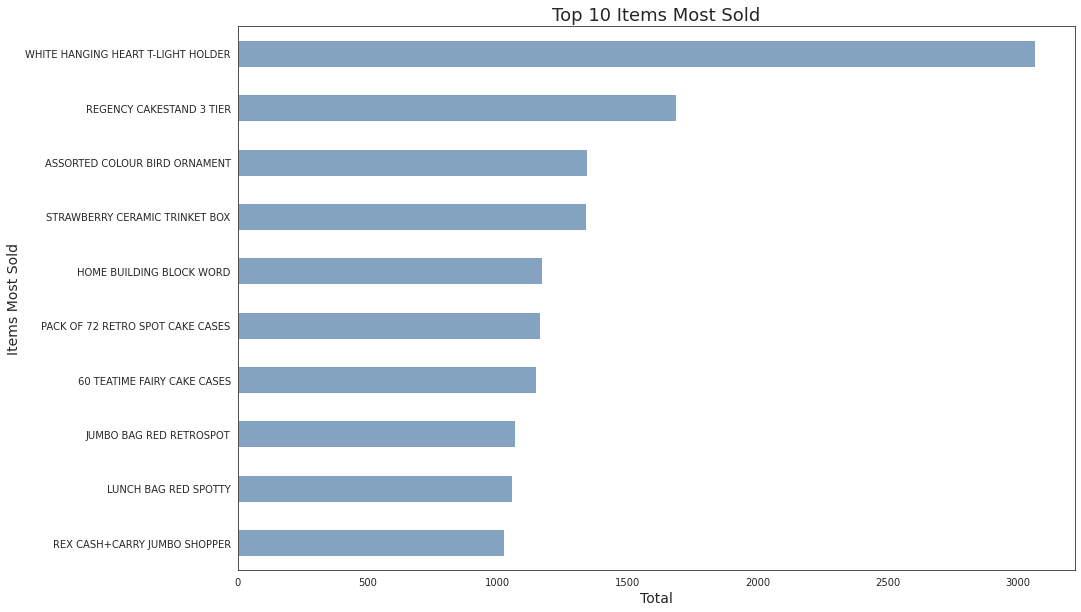

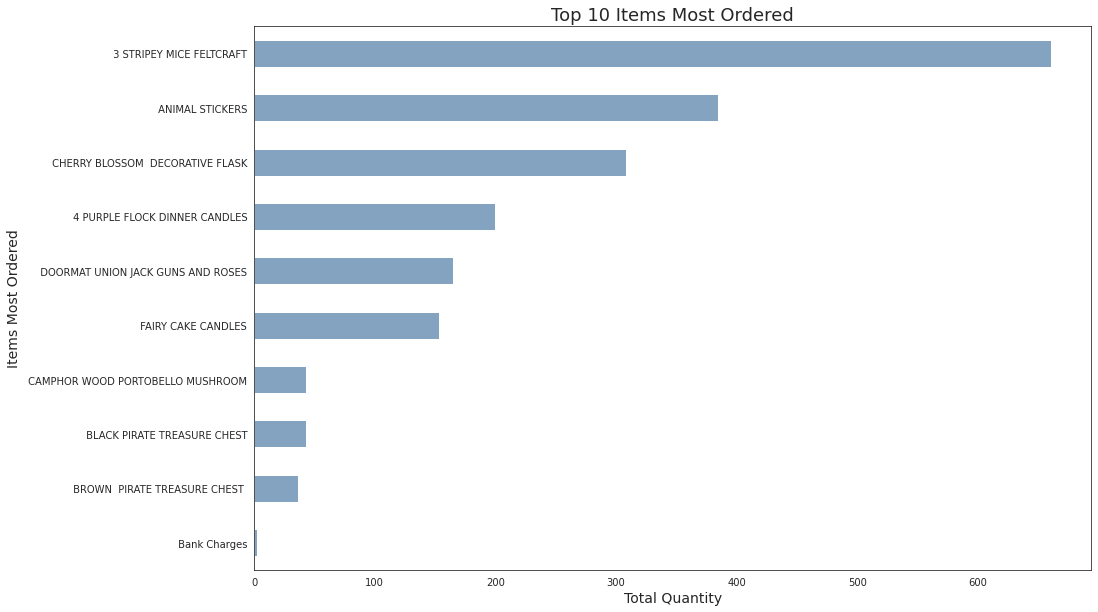

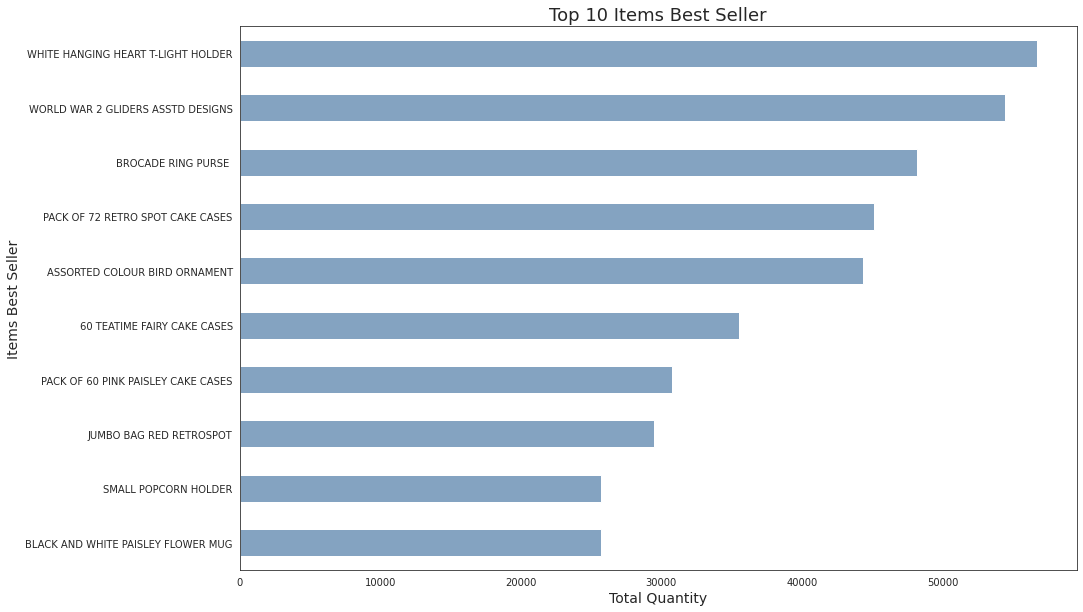

In [28]:
#top 10 frequent items bought.
sns.set_style("white")
most_frequent = data["Description"].value_counts()[:10]
most_frequent= most_frequent.sort_values(ascending=True)
plt.figure(figsize=(15,10))
most_frequent.plot(kind='barh' , color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("Total" , size=14)
plt.ylabel("Items Most Sold" , size=14)
plt.title("Top 10 Items Most Sold" , size=18)


# What is the most ordered product from here? 
most_ordered = data.groupby("Description").agg({"Quantity":"sum"})[:10]
most_ordered = most_ordered.sort_values('Quantity',ascending=True)
#plt.figure(figsize=(15,10))
most_ordered.plot(kind='barh' , legend=None , color=(0.2, 0.4, 0.6, 0.6))
plt.gcf().set_size_inches(15, 10)
plt.xlabel("Total Quantity" , size=14)
plt.ylabel("Items Most Ordered" , size=14)
plt.title("Top 10 Items Most Ordered" , size=18)


#best seller product
best_seller = data.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False)[:10]
best_seller = best_seller.sort_values('Quantity',ascending=True)
#plt.figure(figsize=(15,10))
best_seller.plot(kind='barh' , legend=None , color=(0.2, 0.4, 0.6, 0.6))
plt.gcf().set_size_inches(15, 10)
plt.xlabel("Total Quantity" , size=14)
plt.ylabel("Items Best Seller" , size=14)
plt.title("Top 10 Items Best Seller" , size=18)

In [29]:
#Transactions by countries 
country = data['Country'].value_counts().reset_index()
country.style.background_gradient(cmap='Reds')

,index,Country
0,United Kingdom,357972
1,EIRE,8499
2,Germany,7636
3,France,5436
4,Netherlands,2727
5,Spain,1222
6,Switzerland,1170
7,Belgium,1035
8,Portugal,982
9,Sweden,866


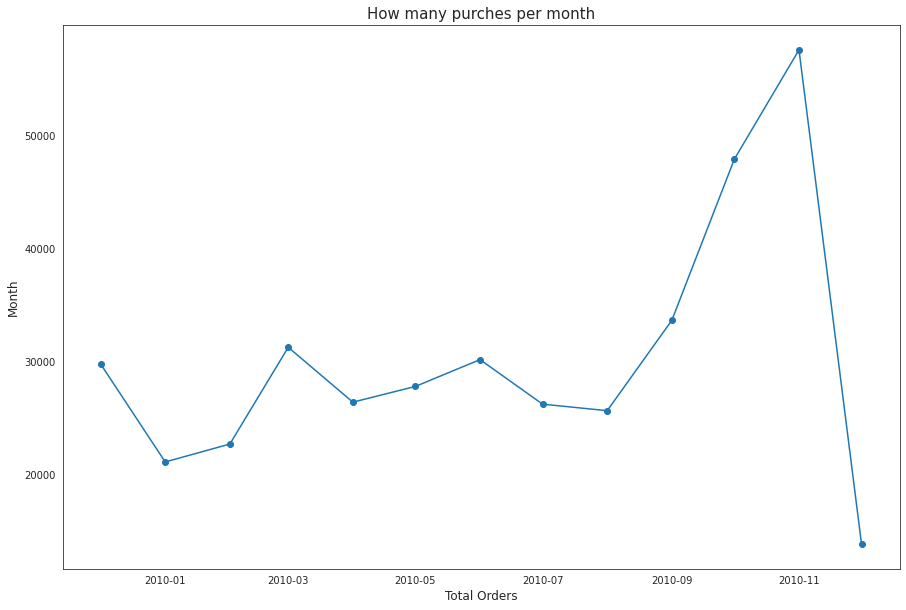

In [30]:
#How many Purches per month
orders_month = pd.DataFrame(data.groupby("month_year" )['Invoice'].count()).reset_index()
#time_data1 = pd.to_datetime(time_data1['month_year'])
plt.figure(figsize=(15,10))
plt.plot( 'month_year', 'Invoice', data=orders_month, linestyle='-', marker='o')
plt.xlabel("Total Orders" , size=12)
plt.ylabel("Month" , size=12)
plt.title("How many purches per month" , size=15)
plt.show()

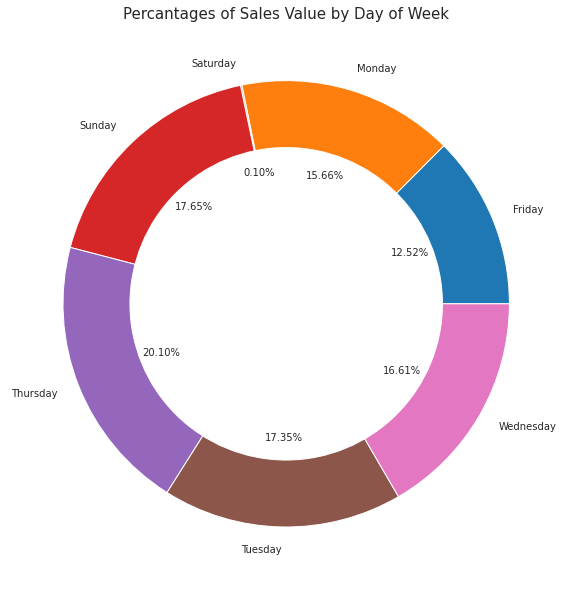

In [31]:
# create data
pie = pd.DataFrame(data.groupby("WeekDay" )['Invoice'].count()).reset_index()
size_of_groups=pie['Invoice']
names='Friday', 'Monday', 'Saturday', 'Sunday','Thursday','Tuesday','Wednesday'
plt.figure(figsize=(10,15))
# Create a pieplot
plt.pie(size_of_groups , labels=names , autopct='%1.2f%%') 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percantages of Sales Value by Day of Week', fontsize = 15)
plt.show()

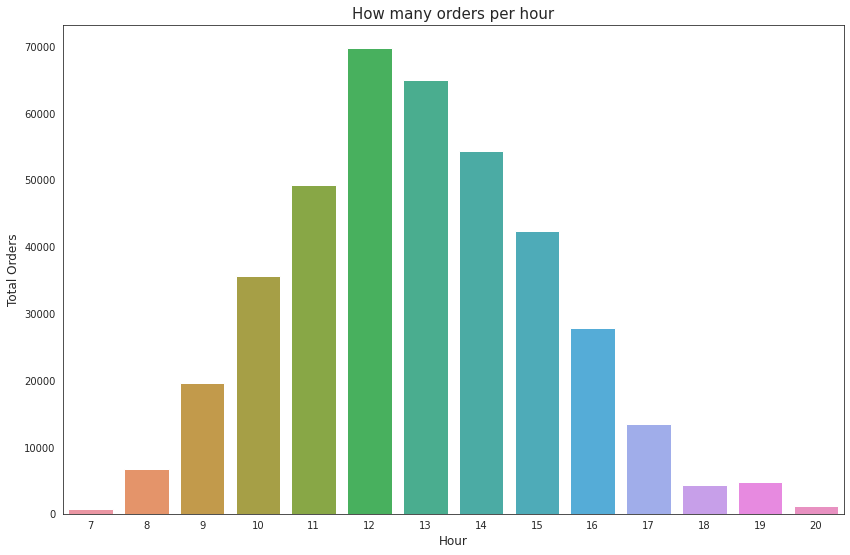

In [32]:
#How many orders per hour
hour = pd.DataFrame(data.groupby(['hour'])['Invoice'].count()).reset_index()
plt.figure(figsize=(14,9))
sns.barplot(x="hour", y="Invoice", data = hour)
plt.ylabel("Total Orders" , size=12)
plt.xlabel("Hour" , size=12)
plt.title("How many orders per hour" , size=15)
plt.show()

In [33]:
# Group by Purchase (Invoice)
invoices = (data.groupby(["Invoice"])[["Quantity", "FinalPrice"]].agg("sum").reset_index())

In [34]:
invoices.head()

,Invoice,Quantity,FinalPrice
0,489434,166,505.30
1,489435,60,145.80
2,489436,193,630.33
3,489437,145,310.75
4,489438,826,2286.24


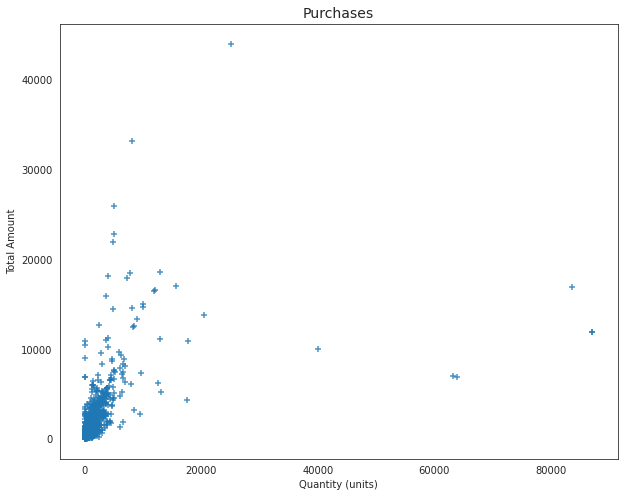

In [35]:
# Correlation Quantity & Final Price amount
plt.figure(figsize=(10,8))
ax =sns.regplot(x=invoices["Quantity"], y=invoices["FinalPrice"], marker="+", fit_reg=False)
ax.set_title('Purchases' , size= 14)
ax.set(xlabel='Quantity (units)', ylabel='Total Amount')
plt.show()

In [36]:
# Sales Average of each product
avg_sales = data.groupby(['StockCode','Description'])['Quantity','FinalPrice'].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales.head()

,,Quantity,FinalPrice
StockCode,Description,,
16044,POP-ART FLUORESCENT PENS,3096.000000,194.400000
85220,SMALL FAIRY CAKE FRIDGE MAGNETS,2447.200000,1375.000000
37410,BLACK AND WHITE PAISLEY FLOWER MUG,1426.944444,167.753889
85218,S/5 MINI ICE CREAM FRIDGE MAGNETS,996.000000,312.600000
37351,ORANGE FLOWER MUG,898.500000,95.025000


In [37]:
pd.DataFrame(data=[data['Invoice'].nunique(),data['StockCode'].nunique(),data['Customer ID'].nunique()],columns=['Count'],
                   index=['Number of Transactions','Number of Unique Products Bought','Number of Unique Customers'])

,Count
Number of Transactions,19211
Number of Unique Products Bought,4013
Number of Unique Customers,4312


In [38]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,FinalPrice,month,year,WeekDay,month_year,hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009,Tuesday,2009-12-01,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,Tuesday,2009-12-01,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,Tuesday,2009-12-01,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,2009,Tuesday,2009-12-01,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009,Tuesday,2009-12-01,7


In [39]:
data = data.rename(columns={'Customer ID': 'CustomerID'})

## Segmentation - RFM Analysis
RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behaviour to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent

### RECENCY

> To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [40]:
#data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64')
data['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [41]:
now = dt.date(2010,12,9)
print(now)

2010-12-09


In [42]:
data['Date'] = data['InvoiceDate'].apply(lambda x: x.date())

In [43]:
recency_df = data.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2010-06-28
1,12347.0,2010-12-07
2,12348.0,2010-09-27
3,12349.0,2010-10-28
4,12351.0,2010-11-29


In [44]:
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2010-06-28,164
1,12347.0,2010-12-07,2
2,12348.0,2010-09-27,73
3,12349.0,2010-10-28,42
4,12351.0,2010-11-29,10


In [45]:
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,164
1,12347.0,2
2,12348.0,73
3,12349.0,42
4,12351.0,10


### Frequency

> Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [46]:
temp = data.copy()
temp.drop_duplicates(['Invoice','CustomerID'],keep='first',inplace=True)
frequency_df = data.groupby(by=['CustomerID'], as_index=False)['Invoice'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,33
1,12347.0,71
2,12348.0,20
3,12349.0,102
4,12351.0,21


### Monetary

> Monetary attribute answers the question: How much money did the customer spent over time?

> To do that, first, we will create a new column total cost to have the total price per invoice.

In [47]:
monetary_df = data.groupby(by='CustomerID',as_index=False).agg({'FinalPrice': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,372.86
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2671.14
4,12351.0,300.93


## Create RFM Table

In [48]:
rfm_df = recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,164,33,372.86
12347.0,2,71,1323.32
12348.0,73,20,222.16
12349.0,42,102,2671.14
12351.0,10,21,300.93


In [49]:
rfm_df.shape

(4312, 3)

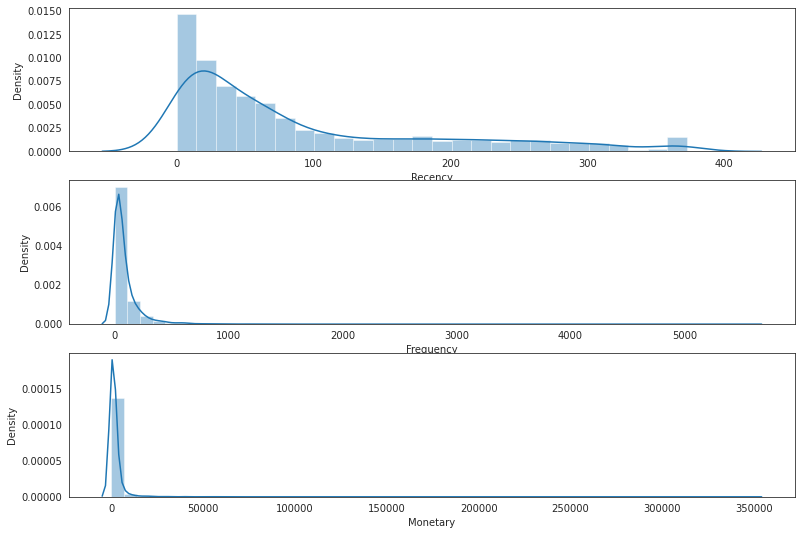

In [50]:
# Visualise the obtained results
plt.figure(figsize=(13,9))
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['Recency'])

plt.subplot(3, 1, 2)
sns.distplot(rfm_df['Frequency'])

plt.subplot(3, 1, 3)
sns.distplot(rfm_df['Monetary'])

plt.show()

In [51]:
#RFM score values 
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'],5,labels=[5,4,3,2,1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'],5,labels=[1,2,3,4,5])

In [52]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,164,33,372.86,2,3,2
12347.0,2,71,1323.32,5,4,4
12348.0,73,20,222.16,2,2,1
12349.0,42,102,2671.14,3,4,5
12351.0,10,21,300.93,5,2,2


In [53]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,18.0,304.9650
0.50,52.0,43.0,691.8200
0.75,135.0,99.0,1710.2875


In [54]:
#RFM score values are combined side by side in str format
(rfm_df['RecencyScore'].astype(str) + 
 rfm_df['FrequencyScore'].astype(str) + 
 rfm_df['MonetaryScore'].astype(str)).head()

CustomerID
12346.0    232
12347.0    544
12348.0    221
12349.0    345
12351.0    522
dtype: object

In [55]:
#calculation of the RFM score
rfm_df["RFM_SCORE"] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

In [56]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.0,164,33,372.86,2,3,2,232
12347.0,2,71,1323.32,5,4,4,544
12348.0,73,20,222.16,2,2,1,221
12349.0,42,102,2671.14,3,4,5,345
12351.0,10,21,300.93,5,2,2,522


In [57]:
#transposition of the RFM table. This makes it easier to evaluate.
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4312.0,90.172542,96.861457,0.00,17.000,52.00,135.0000,373.00
Frequency,4312.0,91.513683,196.064890,1.00,18.000,43.00,99.0000,5566.00
Monetary,4312.0,2032.947448,8909.192574,2.95,304.965,691.82,1710.2875,349164.35


In [58]:
rfm_df['RFM_SCORE'].min()

'111'

In [59]:
print("Best Customers: ",len(rfm_df[rfm_df['RFM_SCORE']=='555']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore']==4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore']==4]))
print('Customers at risk of churning: ', len(rfm_df[rfm_df['RFM_SCORE']=='244']))
print('Almost Churned Customers: ',len(rfm_df[rfm_df['RFM_SCORE']=='144']))
print('Churned Customers: ',len(rfm_df[rfm_df['RFM_SCORE']=='111']))

Best Customers:  309
Loyal Customers:  862
Big Spenders:  862
Customers at risk of churning:  73
Almost Churned Customers:  30
Churned Customers:  255


In [60]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [61]:
#creation of segment variable
rfm_df['Segment_RFM'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
rfm_df['Segment_RFM'] = rfm_df['Segment_RFM'].replace(seg_map, regex=True)

In [62]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment_RFM
CustomerID,,,,,,,,
12346.0,164,33,372.86,2,3,2,232,At Risk
12347.0,2,71,1323.32,5,4,4,544,Champions
12348.0,73,20,222.16,2,2,1,221,Hibernating
12349.0,42,102,2671.14,3,4,5,345,Loyal Customers
12351.0,10,21,300.93,5,2,2,522,Potential Loyalists


In [63]:
rfm_df[["Segment_RFM", "Recency","Frequency","Monetary"]].groupby("Segment_RFM").agg(["mean","count"])

Recency         Frequency           Monetary      
                           mean count        mean count         mean count
Segment_RFM                                                               
About to Sleep        52.621622   333   15.465465   333   446.387267   333
At Risk              164.897351   604   56.642384   604  1146.782869   604
Can't Lose           127.724490    98  211.622449    98  2983.496235    98
Champions              6.045031   644  261.527950   644  6847.152225   644
Hibernating          205.596404  1001   13.845155  1001   453.259591  1001
Loyal Customers       36.359274   771  162.016861   771  2643.698412   771
Need Attention        52.497207   179   43.776536   179   890.186927   179
New Customers          6.790323    62    7.354839    62   463.584355    62
Potential Loyalists   17.667961   515   35.258252   515   959.649456   515
Promising             24.200000   105    8.171429   105   461.975524   105

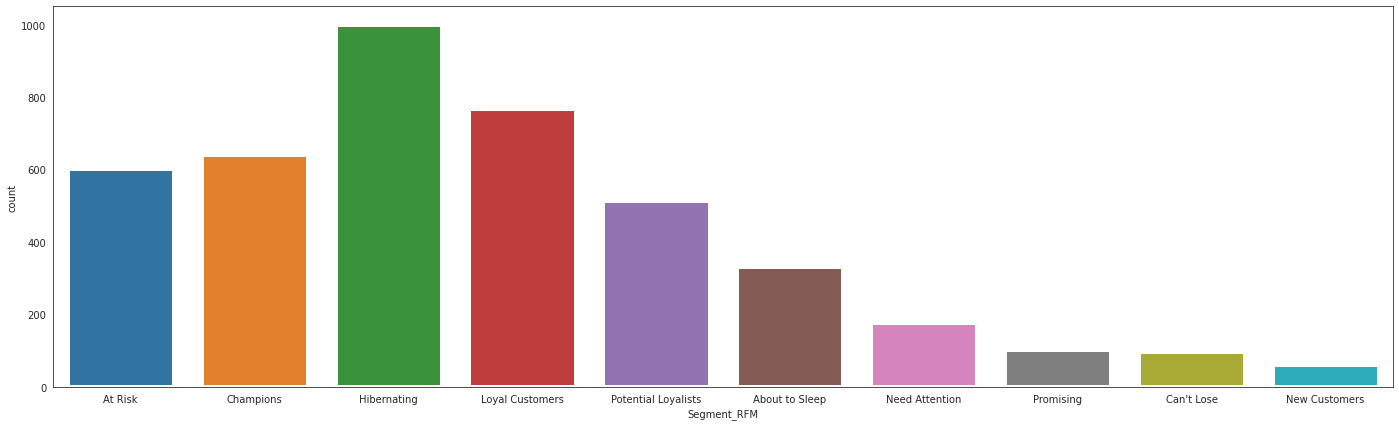

In [64]:
# COUNT PLOT
plt.figure(figsize=(24,7))
ax = sns.countplot(x="Segment_RFM", data=rfm_df,linewidth=5)

3 segments selected for evaluation are **_"Can't Lose"_**, **_"Hibernating"_** and **_"Champions"_**.

_Number of customers for segments_:

**Can't Lose = 71, Hibernating = 1522, Champions = 852**

##### Can't Lose Segment;

> The last shopping date of the customers is on average 353 days before.
* Customers have made an average of 16 purchases.
* Customers spent an average of £ 8356.

##### Hibernating Segment;

> The last shopping date of the customers is 481 days before average.
+ Customers made an average of 1 purchases.
+ Customers spent an average of £ 438.
 
###### Champions Segment;

> The last shopping date of the customers is 30 days before average.
+ Customers made an average of 19 purchases.
+ Customers spent an average of £ 10796.

**_Can't Lose Segment_**;

Customers in this segment have not recently made a purchase. For this reason, we need to prepare a discount and gift campaign for this segment. These customers made a large number of purchases when they made purchases before. However, recency values are lower than they should be. The campaign to be implemented for these customers should include both items purchased and recommendations based on previous activities. New and popular products associated with the products that they were interested in can also be included in this campaign. Situations that will cause these customers to stop buying need to be investigated.

**_Hibernating Segment_**;

Customers in this segment have not made a purchase for a long time. However, by offering discounts, they may be attracted to another purchase.

**_Champions Segment_**;

Customers in this segment are responsible for most of the revenue. Campaigns should be implemented to ensure the continuity of the shopping of these customers.

## Segmentation using K means Clustering

### K-Means Clustering
The K-means clustering belongs to the partition based\centroid based hard clustering family of algorithms, a family of algorithms where each sample in a dataset is assigned to exactly one cluster.This will help us to clarify and indentify users based on their customer behaviour metrics.

In [65]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment_RFM
CustomerID,,,,,,,,
12346.0,164,33,372.86,2,3,2,232,At Risk
12347.0,2,71,1323.32,5,4,4,544,Champions
12348.0,73,20,222.16,2,2,1,221,Hibernating
12349.0,42,102,2671.14,3,4,5,345,Loyal Customers
12351.0,10,21,300.93,5,2,2,522,Potential Loyalists


In [66]:
rfm_data = rfm_df[['Recency', 'Frequency', 'Monetary']]
rfm_data.reset_index(drop=True, inplace=True)
rfm_data.head()

,Recency,Frequency,Monetary
0,164,33,372.86
1,2,71,1323.32
2,73,20,222.16
3,42,102,2671.14
4,10,21,300.93


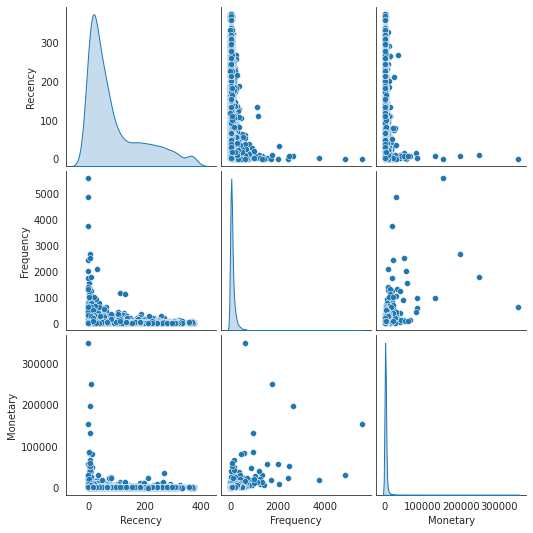

In [67]:
sns.pairplot(rfm_data,diag_kind='kde')

Since clustering algorithms require a normal distribution, normalization of the data is required.

In [68]:
features = rfm_data.columns

In [69]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_data = pd.DataFrame(pt.fit_transform(rfm_data))
rfm_data.columns = features
rfm_data.head()

,Recency,Frequency,Monetary
0,0.980581,-0.199117,-0.504342
1,-1.712833,0.403641,0.489443
2,0.267802,-0.580694,-0.931451
3,-0.157055,0.695018,1.009998
4,-1.050541,-0.544040,-0.679651


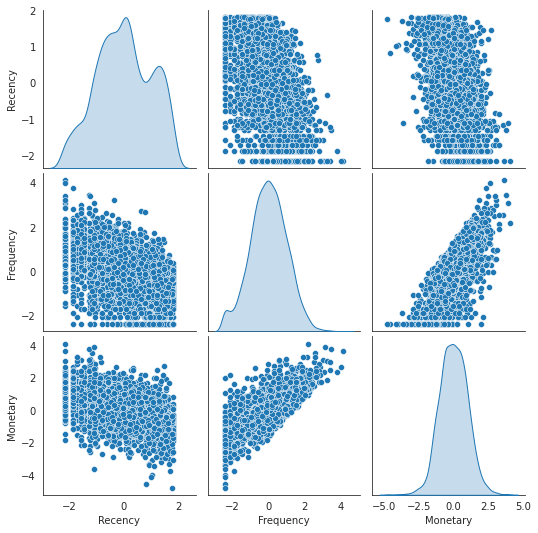

In [70]:
sns.pairplot(rfm_data,diag_kind='kde')

In [71]:
sc  = StandardScaler()
X_scaled = sc.fit_transform(rfm_data)
X_scaled.shape

(4312, 3)

#### The Elbow Method
Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

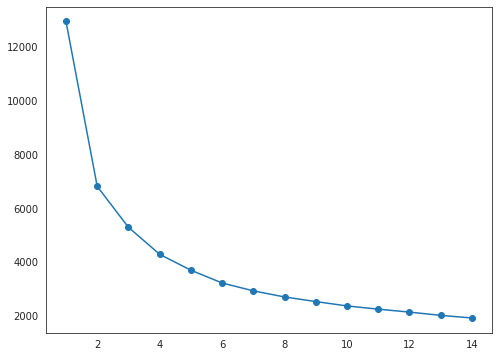

,num_clusters,cluster_errors
0,1,12936.000000
1,2,6808.275446
2,3,5286.084004
3,4,4281.234798
4,5,3691.076866
5,6,3216.396096
6,7,2923.248790
7,8,2696.164486
8,9,2525.279579
9,10,2363.373750


In [72]:
cost = []

for k in range (1, 15):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=100,
        random_state=0)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
    
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    cost.append(interia)
        
plt.figure(figsize=(8, 6))
plt.plot(range (1, 15), cost, marker = "o")
plt.show()

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame({ "num_clusters":range (1, 15), "cluster_errors": cost} )
clusters_df

### KMeans Silhouette Score

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b
Silhouette score, S, for each sample is calculated using the following formula:

- \(S = \frac{(b - a)}{max(a, b)}\)

The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

For n_clusters = 3 The average silhouette_score is : 0.2968785861558537
For n_clusters = 4 The average silhouette_score is : 0.30650072616266294
For n_clusters = 5 The average silhouette_score is : 0.2836839141653919
For n_clusters = 8 The average silhouette_score is : 0.2641490322253081


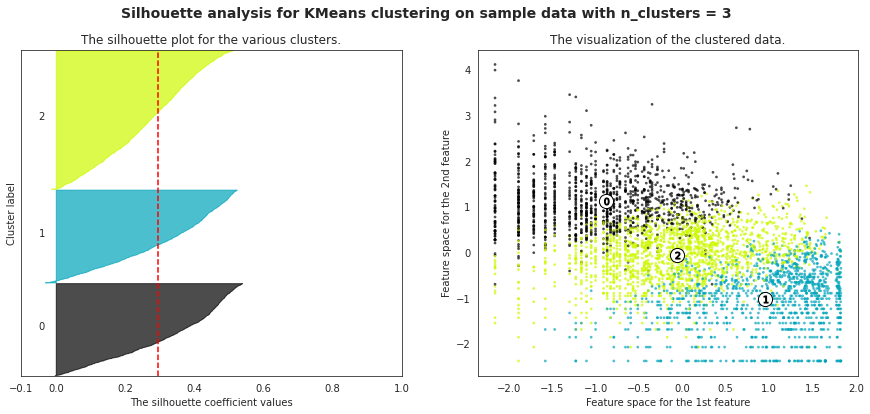

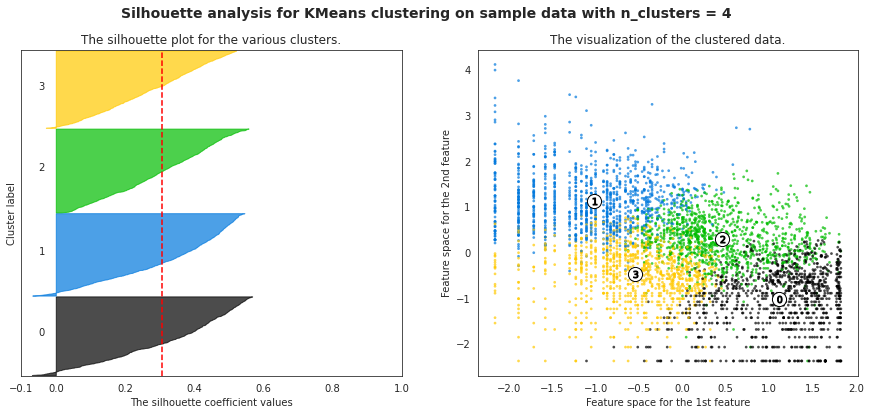

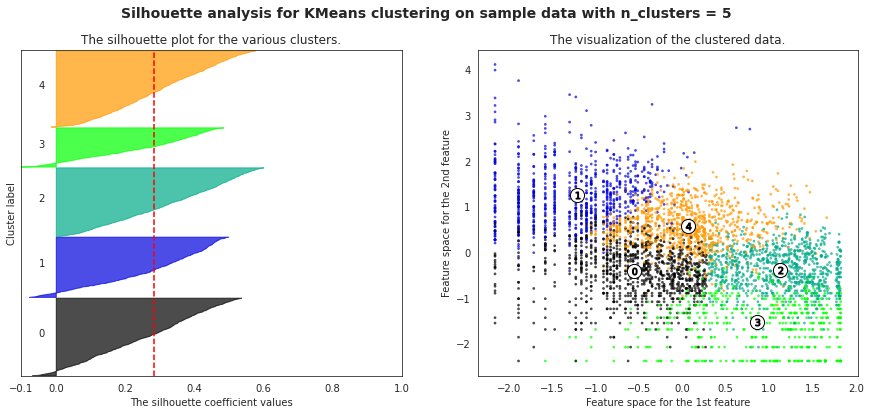

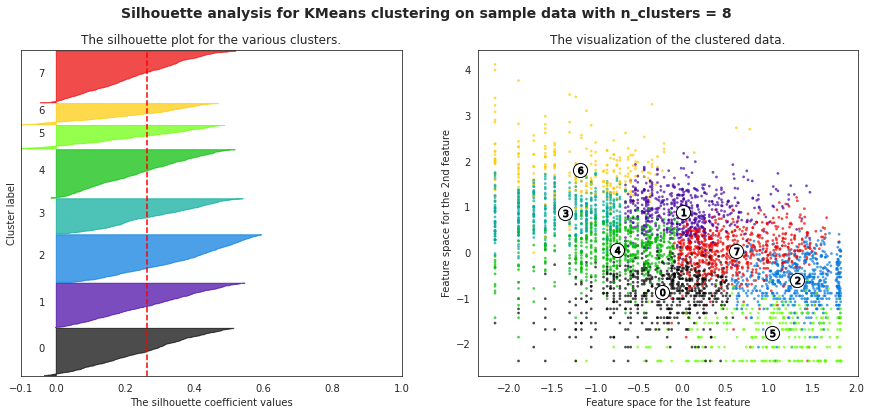

In [84]:
range_n_clusters = [3 , 4, 5 , 8, ]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

When we look at the results of the clustering process, we can infer some interesting insights:

First notice that all K clusters options is valid, because they don't have presence of clusters with below average silhouette scores.
In the other hand, all options had a some wide fluctuations in the size of the silhouette plots.
So, the best choice may lie on the option that gives us a simpler business explanation and at the same time target customers in focus groups with sizes closer to the desired.

The scope of the Elbow Method is to choose the number of cluster where the graph breaks. Ususally it is number 3 so 3 clusters must be in the algorithm.So, we will choose n_clusters = 3 to properly segment our customers.

In [74]:
model = KMeans(n_clusters=3, init='k-means++', n_init=10,max_iter=100, random_state=0)
model = model.fit(X_scaled)
labels = model.labels_
y_km = model.predict(X_scaled)

In [75]:
centroids = model.cluster_centers_
print('Centroid Values:')
print(centroids)

Centroid Values:
[[ 0.95611196 -1.02102891 -1.03773116]
 [-0.87674025  1.11015212  1.07703101]
 [-0.05698631 -0.05491018 -0.02166721]]


In [76]:
# creating new column in df_pca dataframe for cluster number  
rfm_df['Cluster_kmeans'] = labels
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment_RFM,Cluster_kmeans
CustomerID,,,,,,,,,
12346.0,164,33,372.86,2,3,2,232,At Risk,0
12347.0,2,71,1323.32,5,4,4,544,Champions,1
12348.0,73,20,222.16,2,2,1,221,Hibernating,0
12349.0,42,102,2671.14,3,4,5,345,Loyal Customers,1
12351.0,10,21,300.93,5,2,2,522,Potential Loyalists,2


In [77]:
rfm_df['Cluster_kmeans'].value_counts()

2    1847
0    1238
1    1227
Name: Cluster_kmeans, dtype: int64

In [78]:
rfm_df[["Cluster_kmeans", "Recency","Frequency","Monetary"]].groupby("Cluster_kmeans").agg(["mean","count"])

Recency         Frequency           Monetary      
                      mean count        mean count         mean count
Cluster_kmeans                                                       
0               190.348950  1238   15.214863  1238   267.672611  1238
1                23.444988  1227  232.662592  1227  5526.446641  1227
2                67.355171  1847   48.886844  1847   895.365822  1847

In [79]:
rfm_data['Cluster_kmeans'] = labels
rfm_data.head()

,Recency,Frequency,Monetary,Cluster_kmeans
0,0.980581,-0.199117,-0.504342,0
1,-1.712833,0.403641,0.489443,1
2,0.267802,-0.580694,-0.931451,0
3,-0.157055,0.695018,1.009998,1
4,-1.050541,-0.544040,-0.679651,2


In [80]:
rfm_data['Cluster_kmeans'].value_counts()

2    1847
0    1238
1    1227
Name: Cluster_kmeans, dtype: int64

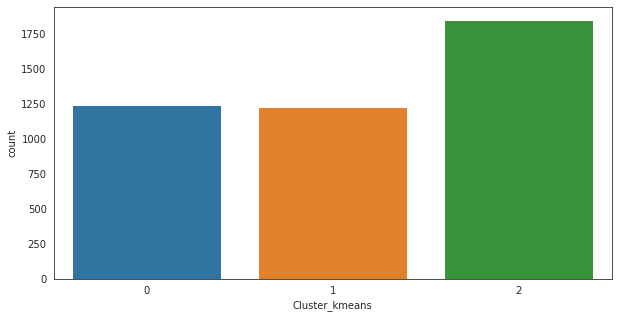

In [81]:
# COUNT PLOT
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Cluster_kmeans", data=rfm_df)

Text(0.5, 1.0, 'K Means Cluster Visualization ')

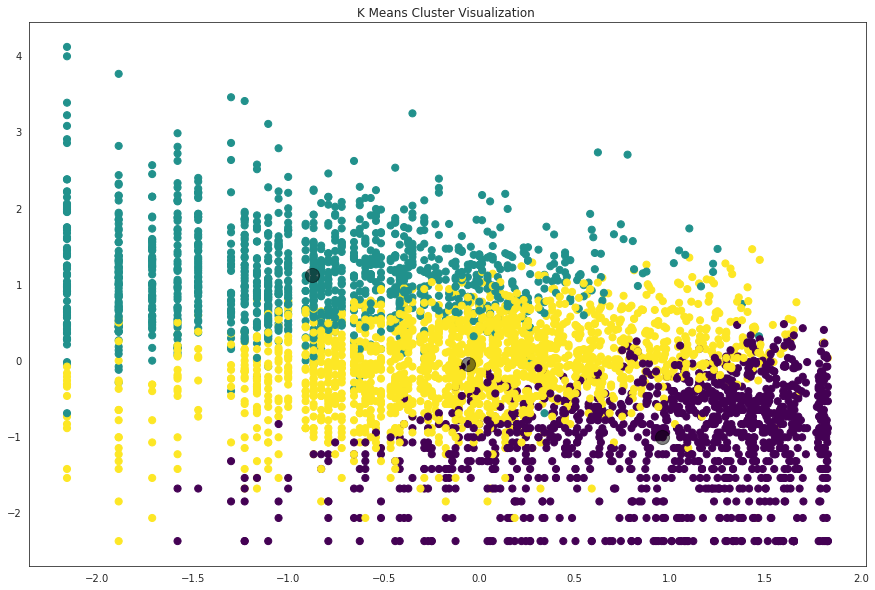

In [82]:
#visualization the cluster
plt.figure(figsize=(15,10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_km, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K Means Cluster Visualization ')

In [83]:
# 3d scatterplot using plotly for kmeans
# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=X_scaled[:, 0], y=X_scaled[:, 1], z=X_scaled[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data2 = [trace]
fig = go.Figure(data = data2, layout = layout)
fig.show()

## Segmentation Using Agglomerative Hierarchical Clustering

The Agglomerative Hierarchical Clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). It's a “bottom-up” approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

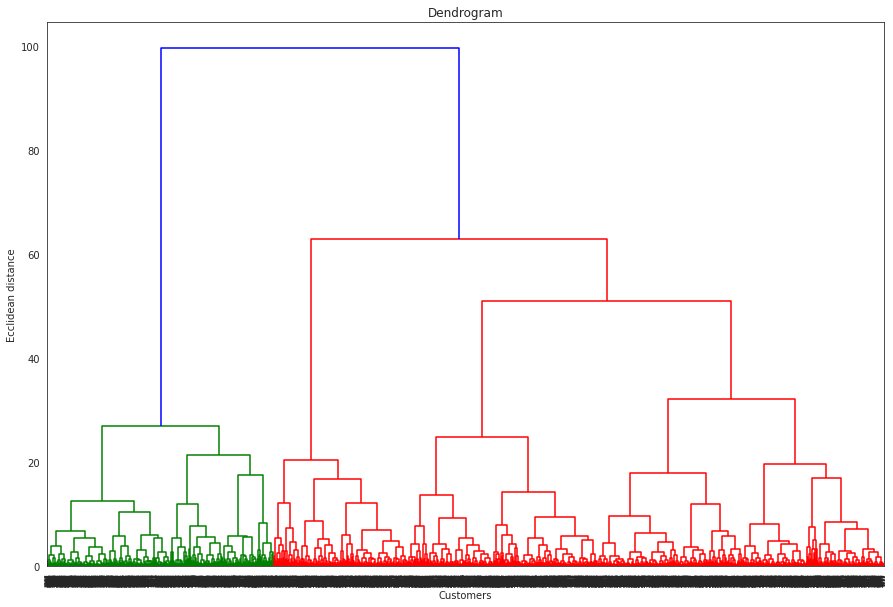

In [85]:
#Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_scaled , method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Ecclidean distance')
plt.show()

In [86]:
#Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X_scaled)
labels_hc = hc.labels_

In [87]:
# creating new column in df_pca dataframe for hierarchical cluster number  
rfm_df['Cluster_hc'] = labels_hc
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment_RFM,Cluster_kmeans,Cluster_hc
CustomerID,,,,,,,,,,
12346.0,164,33,372.86,2,3,2,232,At Risk,0,0
12347.0,2,71,1323.32,5,4,4,544,Champions,1,0
12348.0,73,20,222.16,2,2,1,221,Hibernating,0,0
12349.0,42,102,2671.14,3,4,5,345,Loyal Customers,1,0
12351.0,10,21,300.93,5,2,2,522,Potential Loyalists,2,0


In [88]:
rfm_df['Cluster_hc'].value_counts()

0    2453
1    1171
2     688
Name: Cluster_hc, dtype: int64

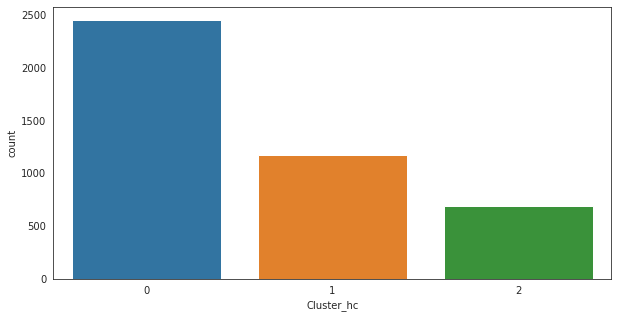

In [89]:
# COUNT PLOT
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Cluster_hc", data=rfm_df)

In [90]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X_scaled, y_hc)
print(clf.centroids_)

ModuleNotFoundError: ignored

NameError: ignored

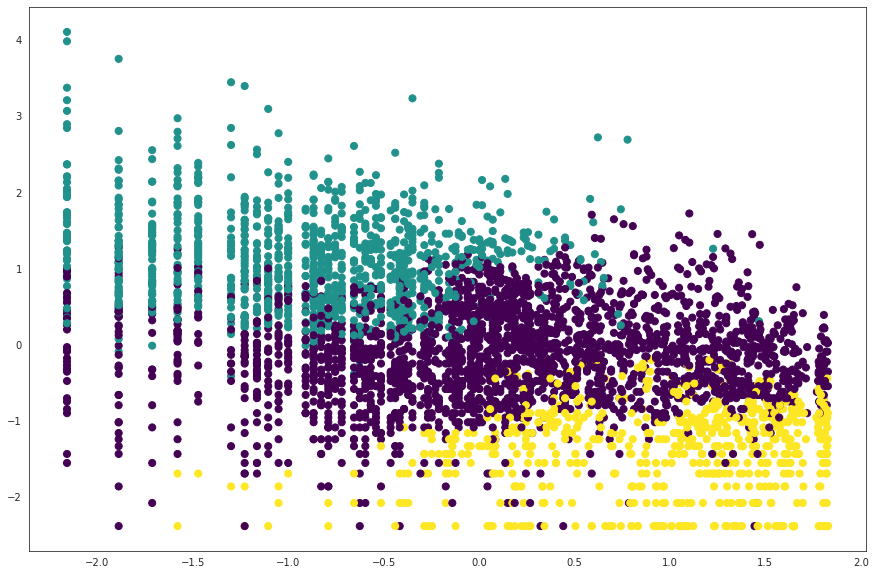

In [91]:
#visualization the cluster
plt.figure(figsize=(15,10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_hc, s=50, cmap='viridis')
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Agglomerative Hierarchical Clustering  Visualization ')

In [92]:
# 3d scatterplot using plotly for kmeans
# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = hc.labels_
trace = go.Scatter3d(x=X_scaled[:, 0], y=X_scaled[:, 1], z=X_scaled[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data3 = [trace]
fig = go.Figure(data = data2, layout = layout)
fig.show()

In [93]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment_RFM,Cluster_kmeans,Cluster_hc
CustomerID,,,,,,,,,,
12346.0,164,33,372.86,2,3,2,232,At Risk,0,0
12347.0,2,71,1323.32,5,4,4,544,Champions,1,0
12348.0,73,20,222.16,2,2,1,221,Hibernating,0,0
12349.0,42,102,2671.14,3,4,5,345,Loyal Customers,1,0
12351.0,10,21,300.93,5,2,2,522,Potential Loyalists,2,0


In [94]:
df2 = rfm_df.reset_index() 

In [95]:
df2

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment_RFM,Cluster_kmeans,Cluster_hc
0,12346.0,164,33,372.86,2,3,2,232,At Risk,0,0
1,12347.0,2,71,1323.32,5,4,4,544,Champions,1,0
2,12348.0,73,20,222.16,2,2,1,221,Hibernating,0,0
3,12349.0,42,102,2671.14,3,4,5,345,Loyal Customers,1,0
4,12351.0,10,21,300.93,5,2,2,522,Potential Loyalists,2,0
...,...,...,...,...,...,...,...,...,...,...,...
4307,18283.0,17,204,596.97,4,5,3,453,Loyal Customers,1,1
4308,18284.0,66,28,461.68,3,2,2,322,About to Sleep,2,0
4309,18285.0,295,12,427.00,1,1,2,112,Hibernating,0,0
4310,18286.0,111,67,1296.43,2,4,4,244,At Risk,2,0


In [96]:
df2 = pd.DataFrame(df2)
df2.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment_RFM,Cluster_kmeans,Cluster_hc
0,12346.0,164,33,372.86,2,3,2,232,At Risk,0,0
1,12347.0,2,71,1323.32,5,4,4,544,Champions,1,0
2,12348.0,73,20,222.16,2,2,1,221,Hibernating,0,0
3,12349.0,42,102,2671.14,3,4,5,345,Loyal Customers,1,0
4,12351.0,10,21,300.93,5,2,2,522,Potential Loyalists,2,0


In [97]:
df1 = data.copy()

In [98]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,FinalPrice,month,year,WeekDay,month_year,hour,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009,Tuesday,2009-12-01,7,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,Tuesday,2009-12-01,7,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009,Tuesday,2009-12-01,7,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,2009,Tuesday,2009-12-01,7,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009,Tuesday,2009-12-01,7,2009-12-01


In [99]:
merged_inner = pd.merge(left=df1, right=df2, left_on='CustomerID', right_on='CustomerID')

In [100]:
merged_inner.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,FinalPrice,month,...,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment_RFM,Cluster_kmeans,Cluster_hc
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,...,314,62,2017.2,1,4,4,144,At Risk,2,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,...,314,62,2017.2,1,4,4,144,At Risk,2,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,...,314,62,2017.2,1,4,4,144,At Risk,2,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,...,314,62,2017.2,1,4,4,144,At Risk,2,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,...,314,62,2017.2,1,4,4,144,At Risk,2,0
